In [1]:
# Import basic libraries for data processing & visualization

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

# Import libraries from sklearn for modelling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Set plotting and display options

%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_rows',None)

# PRELIMINARY ANALYSIS

In [2]:
# Load the dataset 

df = pd.read_csv('D:/PGP-DSE/Capstone/Dataset/bank/bank-full.csv', sep = ';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
print(df.shape)
print(df.dtypes)

(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [4]:
# Convert 'day' column into categorical variable

df['day'] = df['day'].astype('O')

In [5]:
# Print the number of unique values in each column

print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [6]:
# Make the list of continuous and categorical columns

num_col = ['age','balance','duration','campaign','pdays','previous']
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
target_col = ['y']

In [7]:
# Print the statistical summary of numerical columns 

df_cat = df[cat_col]
df_num = df[num_col]

df_num.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Print the statistical summary of categorical columns 

df_cat.describe()

,job,marital,education,default,housing,loan,contact,day,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959


In [9]:
# Now, let's check the number of missing values in each columns and no of duplicate rows 

print(df.isnull().sum())

print('\nTotal no of duplicate rows =',df.duplicated().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Total no of duplicate rows = 0


### OBSERVATIONS

### 1. We can observe that for the columns 'previous' & 'pdays', values upto the 75th percentile are '0' and '-1' respectively (low variance)
### 2. Similarly, for the campaign column, upto 75th percentile, values belong to {1,2,3}
### 3. From the preliminary analysis, there are no null values in the dataset. However we need to check whether there are missing values in the non standard format by analyzing each column in detail.

#  **UNIVARIATE ANALYSIS**

### **NUMERICAL FEATURES**

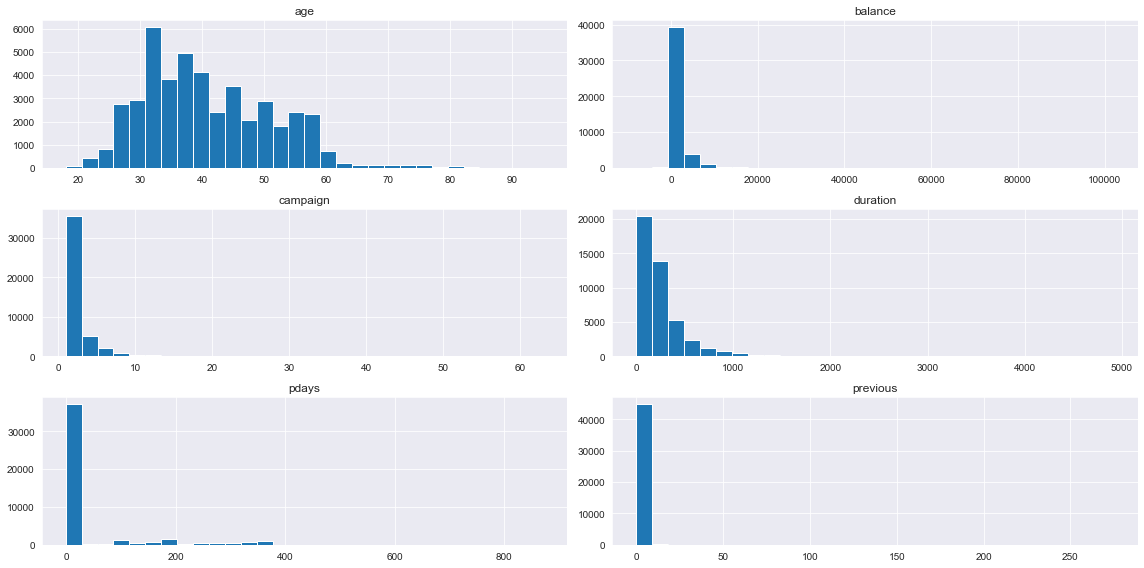

In [10]:
# Now let's check the distribution of the numerical columns in the data

df_num.hist(figsize=(16,8), bins=30)
plt.tight_layout()
plt.show()

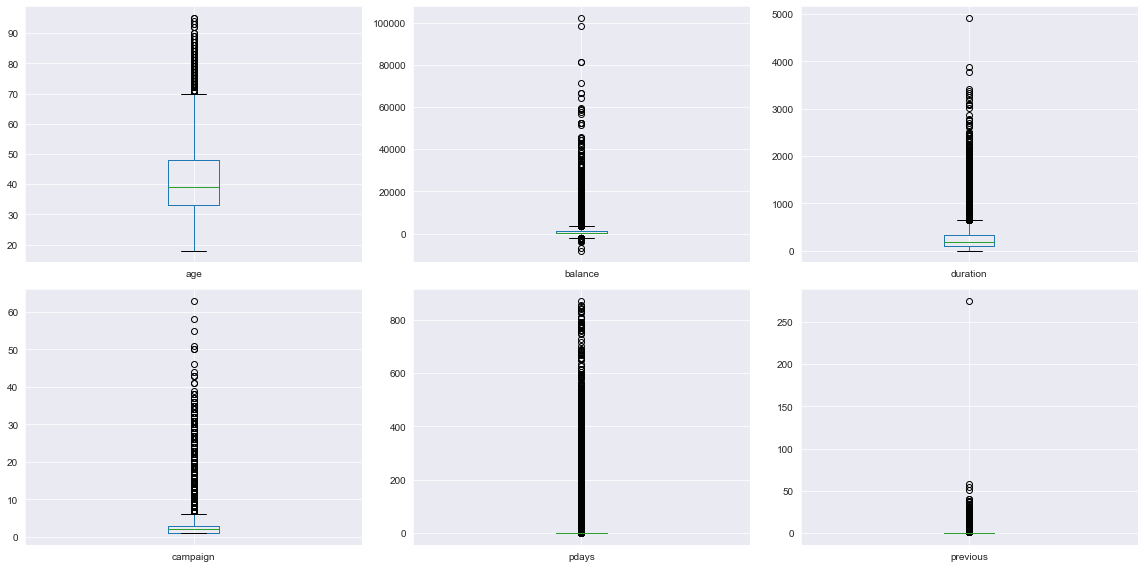

In [11]:
# Box plot of numeric variables 

df_num.plot(kind='box', figsize=(16,8), subplots=True, layout = (2,3))
plt.tight_layout()
plt.show()

In [12]:
# Print the skew value of numerical variables

df[num_col].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

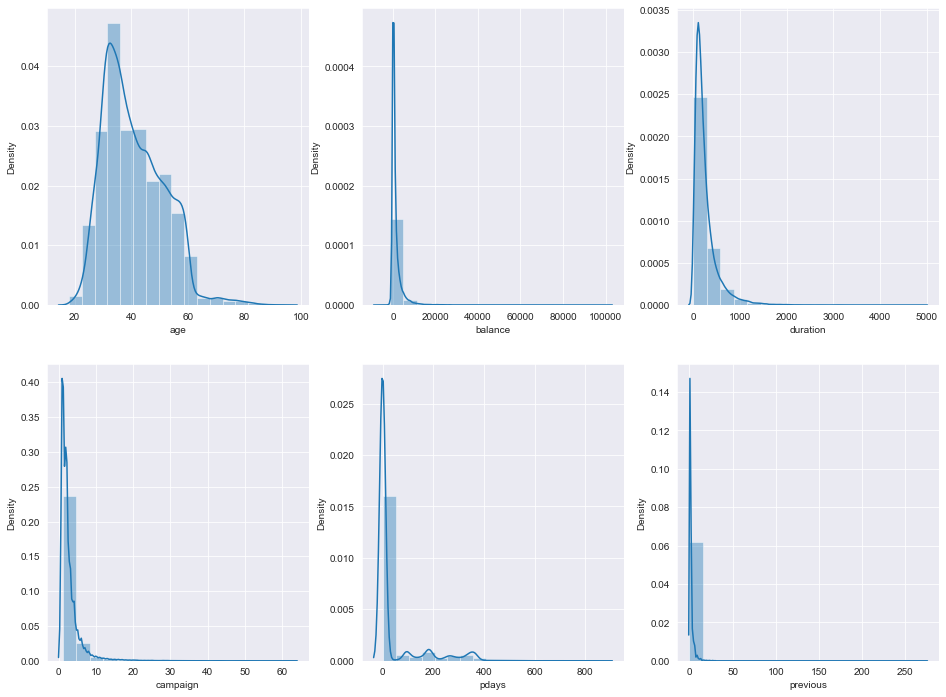

In [13]:
# Let's see the dist plots of skewed variables in more detail

fig, axes = plt.subplots(2,3, figsize=(16,12))

for i in range(6): 
    bin_edges = np.histogram_bin_edges(df_num[num_col[i]], bins = 'sturges')
    sns.distplot(df_num[num_col[i]], bins=bin_edges, ax = axes.flat[i])
plt.show()

### OBSERVATIONS
### 1. Except age, all other variables skew highly to the right.
### 2. Columns 'campaign', 'previous' & 'pdays' show a low degree of variation with most of the value in pdays being '-1' and in previous being '0'.
### 3. Except age, all other variables have large no of outliers.

### **CATEGORICAL FEATURES**

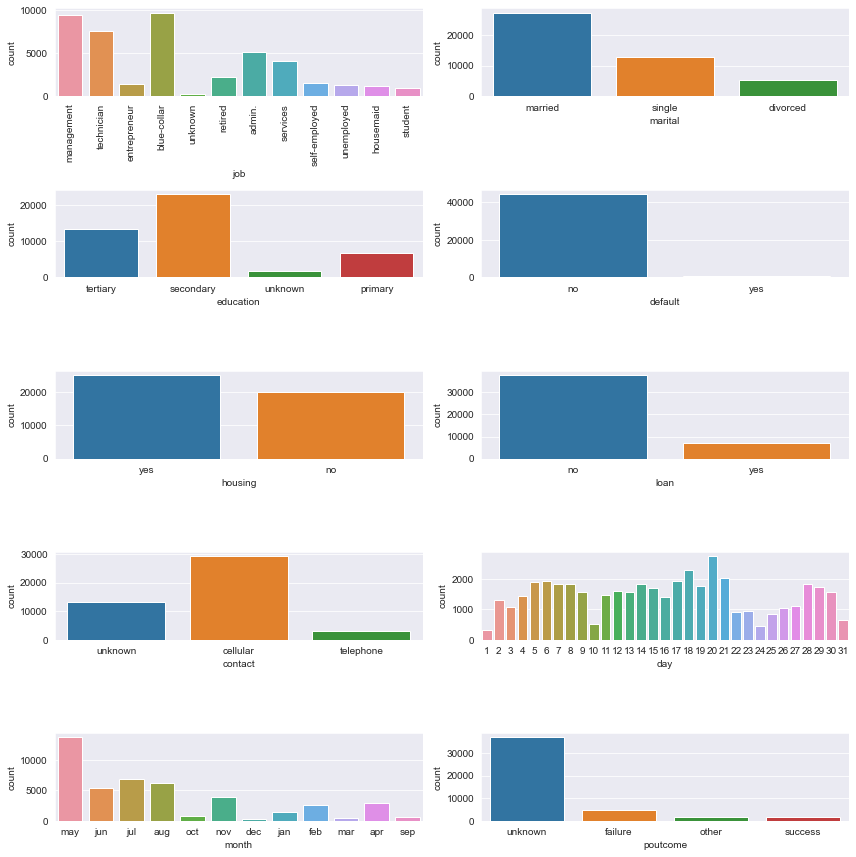

In [14]:
# Now, moving to the categorical variables, let's see the distribution of different classes within each of the categorical columns.

fig, axes = plt.subplots(5,2, figsize=(12,12))
for i in range(1,11):
    sns.countplot(x = cat_col[i-1], data=df_cat, ax=axes.flat[i-1])
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

In [15]:
# Display the percent count of categories in each variable

grouped = df_cat[cat_col].melt(var_name='column', value_name='value').groupby('column')
percent_counts = pd.DataFrame(grouped['value'].value_counts(normalize=True)*100)
percent_counts.index.set_names(['column', 'categories'], inplace=True)
percent_counts.columns = ['percent']

percent_counts

percent
column    categories              
contact   cellular       64.774059
          unknown        28.798301
          telephone       6.427639
day       20              6.087014
          18              5.104952
          21              4.481210
          17              4.288779
          6               4.273296
          5               4.224636
          14              4.087501
          8               4.074230
          28              4.047688
          7               4.018933
          19              3.886222
          29              3.859680
          15              3.766782
          12              3.545597
          13              3.505784
          30              3.463759
          9               3.452700
          11              3.271328
          4               3.196125
          16              3.129769
          2               2.859923
          27              2.479485
          3               2.386587
          26              2.289266
          23              2.076928
          22              2.001725
          25              1.857955
          31              1.422220
          10              1.159010
          24              0.988697
          1               0.712216
default   no             98.197341
          yes             1.802659
education secondary      51.319369
          tertiary       29.419831
          primary        15.153392
          unknown         4.107407
housing   yes            55.583818
          no             44.416182
job       blue-collar    21.525735
          management     20.919688
          technician     16.803433
          admin.         11.437482
          services        9.188029
          retired         5.007631
          self-employed   3.492513
          entrepreneur    3.289023
          unemployed      2.882042
          housemaid       2.742695
          student         2.074716
          unknown         0.637013
loan      no             83.977351
          yes            16.022649
marital   married        60.193316
          single         28.289576
          divorced       11.517109
month     may            30.448342
          jul            15.250713
          aug            13.817434
          jun            11.813497
          nov             8.781049
          apr             6.485147
          feb             5.859194
          jan             3.103227
          oct             1.632346
          sep             1.280662
          mar             1.055053
          dec             0.473336
poutcome  unknown        81.747805
          failure        10.840282
          other           4.069806
          success         3.342107

### OBSERVATIONS

### 1. Colunns 'loan' and 'default' are highly imbalanced with majority of 'no' class.
### 2. Largest no of clients are from blue-collar, management & technician classes
### 3. Largest no of clients have secondary education, followed by tertiary and primary.
### 4. Largest no are married, followed by single and divorces
### 5. Most frequent mode of contact is through cellphone.
### 6. 'poutcome' column is imbalanced with majority of 'unknown' class

### MISSING / UNKNOWN DATA 

### 1. Job column has 0.63%  'unknown' values
### 2. Education column has 4.1% 'unknown' values
### 3. Contact columns has significant no of 'unknown' values (28.8%)
### 4. 'poutcome' is 'unknown' for a majority of clients (81.7%), showing that this is the first campaign where they are contacted.

# MULTIVARIATE ANALYSIS 
### RELATIONSHIP BETWEEN FEATURES

In [16]:
# Let's start by checking the correlation matrix for the dataframe to obtain the degree of correlation between the numerical variables.

corr_mat = df_num.corr()
corr_mat

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


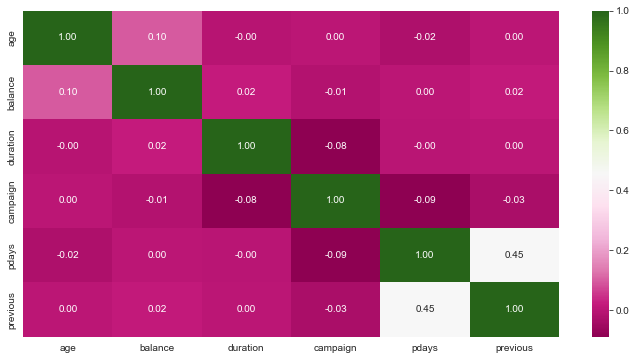

In [17]:
# Plotting a heat map of the same

plt.figure(figsize=(12,6))
sns.heatmap(corr_mat, annot=True, cmap='PiYG', fmt='.2f')
plt.show()

# The only columns that possess a significant correlation with each other are 'previous' and 'pdays' (0.45)

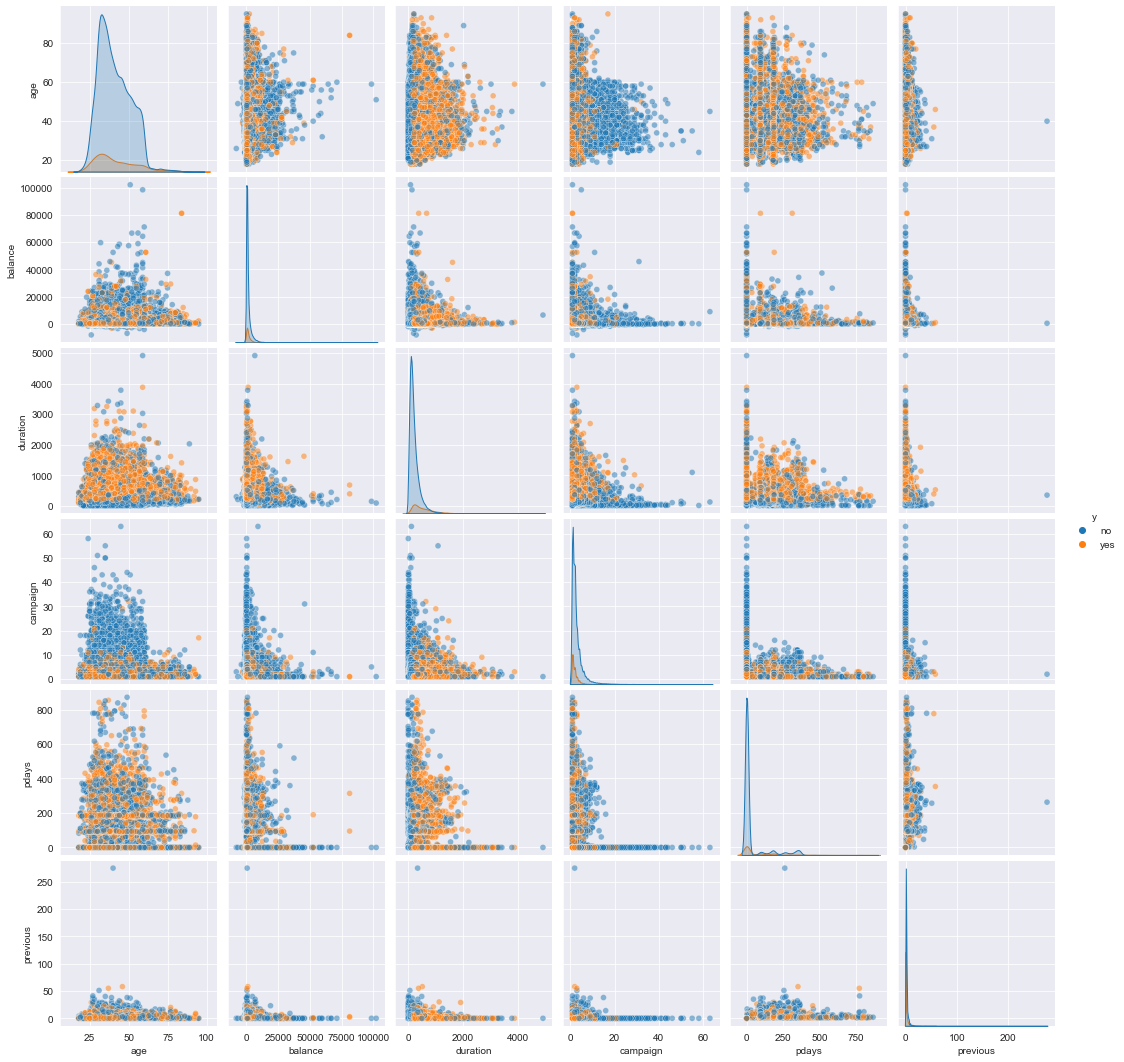

In [18]:
# Scatter plots between pairs of numerical variables to visualize their relationship

col_list = num_col + ['y']
sns.pairplot(data = df[col_list], hue = 'y', plot_kws={"alpha":0.5})
plt.show()

# Again it's seen that none of the columns show any significant correlation with each other
# Also, we see a fairly uniform distribution of yes/no outcomes (visualized by red/orange dots) for most columns 

### OBSERVATIONS
### 1. We can observe that all the columns of numerical data show no correlation with each other
### 2. Only exception is 'pdays' and 'previous' which have a correlation of 0.45
### 3. Thus, multicollinerality assumption is satisfied for the data

### FEATURE-TARGET RELATIONSHIP

In [19]:
# Distribution of target variable in dataset

df['y'].value_counts().to_frame()

# Target variable is highly unbalanced with 88% no cases.

,y
no,39922
yes,5289


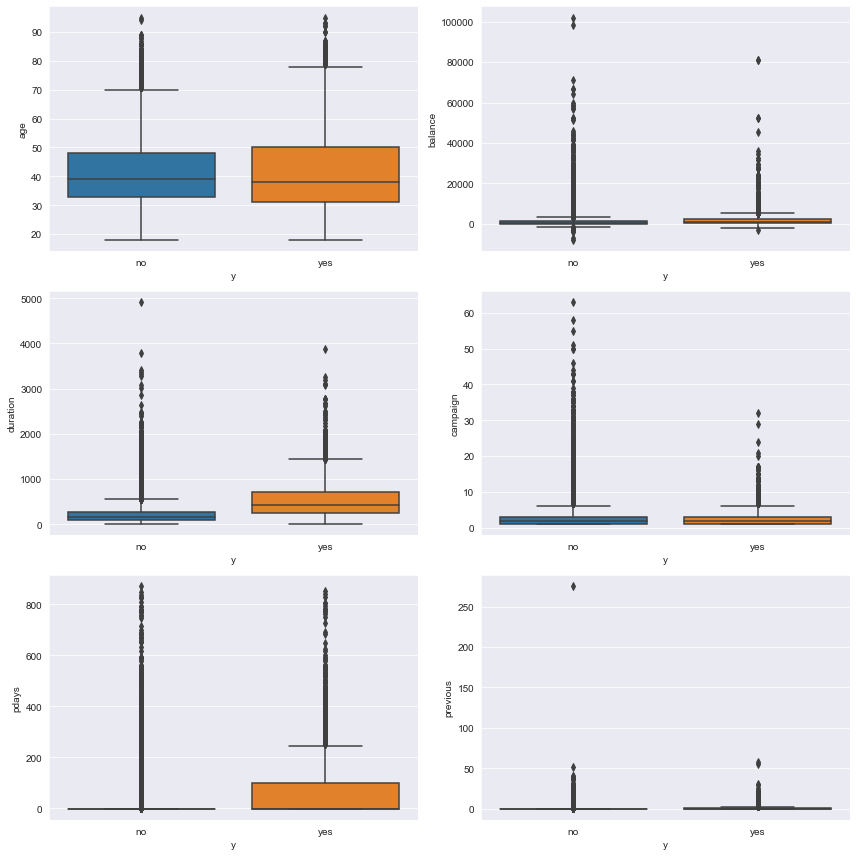

In [20]:
# Let's visualize the distribution of target / outcome (y/n) in details for each of the columns using the 'hue' parameter

fig, axes = plt.subplots(3,2, figsize=(12,12))
for i in range(1,7):
    sns.boxplot(x = 'y', y = num_col[i-1], data=df, ax=axes.flat[i-1],orient = 'v')

plt.tight_layout()
plt.show()

In [21]:
# Perform 2 sample t-test to confirm the relation of numerical variable with target
# NULL HYPOTHESIS (H0) - Mean of target groups (yes/no) are the same
# ALTERNATE (H1) - Mean of target groups (yes/no) are different

from scipy.stats import ttest_ind

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    tstat, pval = ttest_ind(samp1, samp2)
    print('For column',num_col[i-1],'t-stat =',tstat,'; p value for t-test=',pval/2)
    
# p value for each column is less than 0.01 which means that there is a difference in means
# Duration has the highest difference based on target (yes/no)

For column age t-stat = -5.350255423036203 ; p value for t-test= 4.4128218459611975e-08
For column balance t-stat = -11.25043445878562 ; p value for t-test= 1.2605568459375734e-29
For column duration t-stat = -91.28943612670862 ; p value for t-test= 0.0
For column campaign t-stat = 15.599948860003781 ; p value for t-test= 5.0617368210481484e-55
For column pdays t-stat = -22.151671780724012 ; p value for t-test= 1.895276659739017e-108
For column previous t-stat = -19.910901271473993 ; p value for t-test= 3.9009151749026054e-88


In [22]:
# Perform Levene test to confirm if the 'yes' and 'no' subsets of numerical columns have the same variance. 

# NULL HYPOTHESIS (H0) - Target groups (yes/no) have equal variances
# ALTERNATE (H1) - Target groups (yes/no) have unequal variances

from scipy.stats import levene

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    stat, pval = levene(samp1, samp2)
    print('For column',num_col[i-1],', p value for Levene test =',pval)
    
# We can see that for each numerical column, p value is much less than 0.01
# Therefore we reject the null , i.e variances are not the same

For column age , p value for Levene test = 2.420857912510469e-133
For column balance , p value for Levene test = 5.020129382284311e-15
For column duration , p value for Levene test = 0.0
For column campaign , p value for Levene test = 8.220318168029953e-33
For column pdays , p value for Levene test = 3.79055331945749e-108
For column previous , p value for Levene test = 7.801830349772383e-88


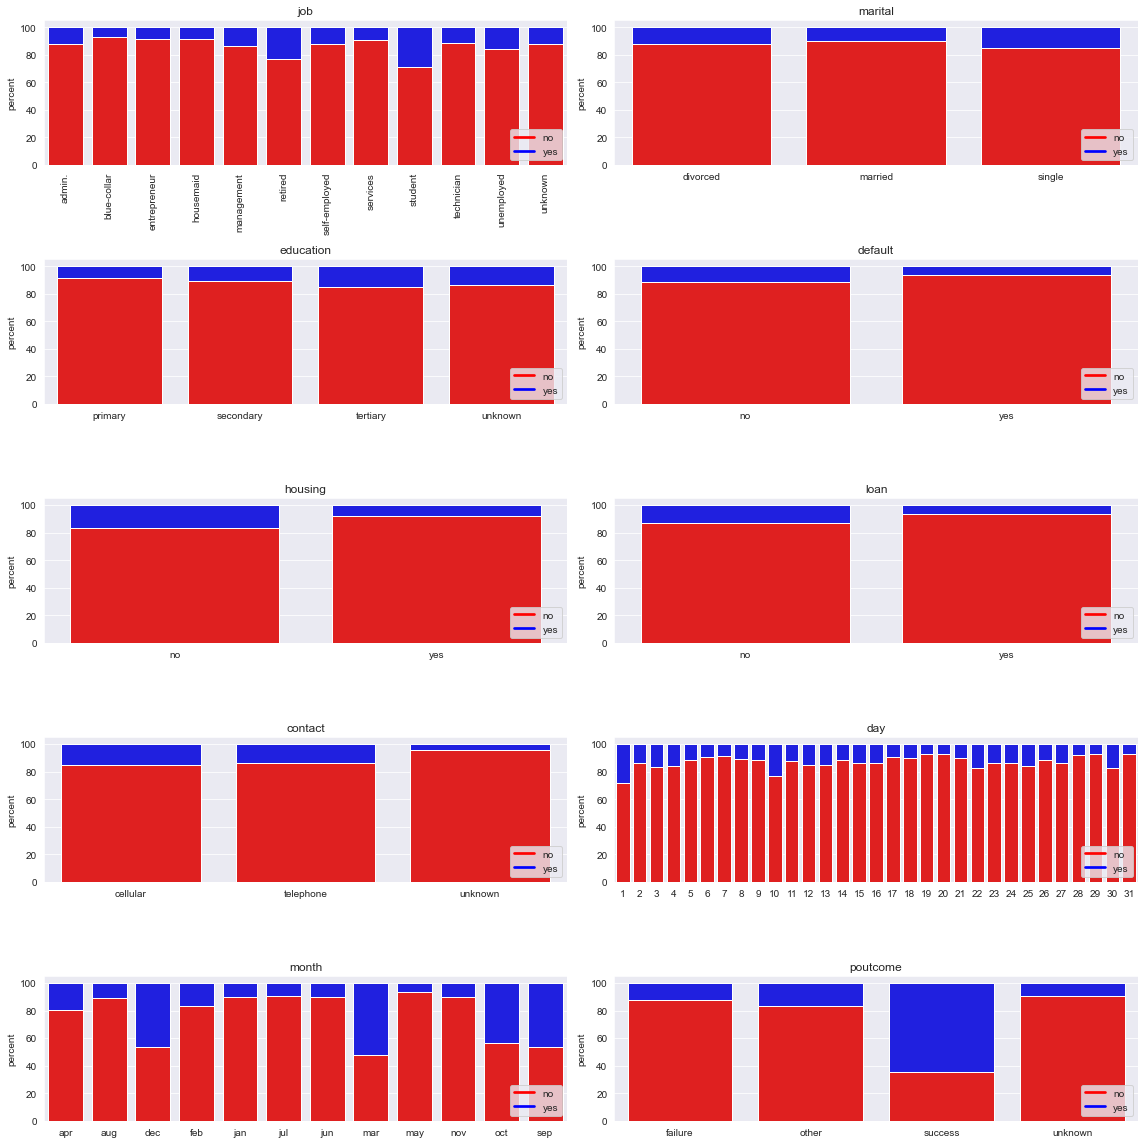

In [23]:
# Let's now check the distribution of target classes (yes/no) with respect to categorical variables

fig, axes = plt.subplots(5,2, figsize=(16,16))

for i in range(1,11):
    percent_counts = df.groupby([cat_col[i-1]])['y'].value_counts(normalize=True)*100
    df_counts = percent_counts.to_frame().unstack().droplevel(0, axis=1)
    df_counts.columns = ['no_count','yes_count']
    df_counts['total'] = df_counts.sum(axis=1)

    sns.barplot(data=df_counts, x=df_counts.index, y='total', ax=axes.flat[i-1], color='b')
    sns.barplot(data=df_counts, x=df_counts.index, y='no_count', ax=axes.flat[i-1], color='r')
    axes.flat[i-1].set_title("%s" %(cat_col[i-1]))
    axes.flat[i-1].set(xlabel = None, ylabel = 'percent')
    leg = axes.flat[i-1].legend(['no','yes'], loc = 'lower right')
    leg.legendHandles[0].set_color('r')
    leg.legendHandles[1].set_color('b')
    
labels = axes.flat[0].get_xticklabels()
axes.flat[0].set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

### OBSERVATIONS
### 1. Highly unbalanced distribution of 'yes' and 'no' outcomes in most columns of given data
### 2. Distribution of duration/pdays shows clear relationship with target variable (y/n)
### 3. Distribution of poutcome shows clear relationship with target variable (y/n)

# FEATURE ENGINEERING

### 'PREVIOUS', 'POUTCOME' & 'PDAYS'

In [24]:
# Columns related to previous marketing campaigns - 'poutcome', 'pdays', 'previous'. 
# We habe to analyze relation between these columns in detail to make the best use of the available data.

tab1 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['pdays'], aggfunc='mean')
tab2 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['previous'], aggfunc='mean')

pd.concat([tab1,tab2], axis=1, keys = ['pdays','previous'])

pdays              previous          
y                 no         yes        no       yes
poutcome                                            
failure   242.783329  232.679612  2.866682  3.103560
other     233.485323  210.700326  4.011089  4.000000
success   166.412758  161.540900  3.013133  3.109407
unknown    -0.966789   -0.914944  0.000417  0.000886

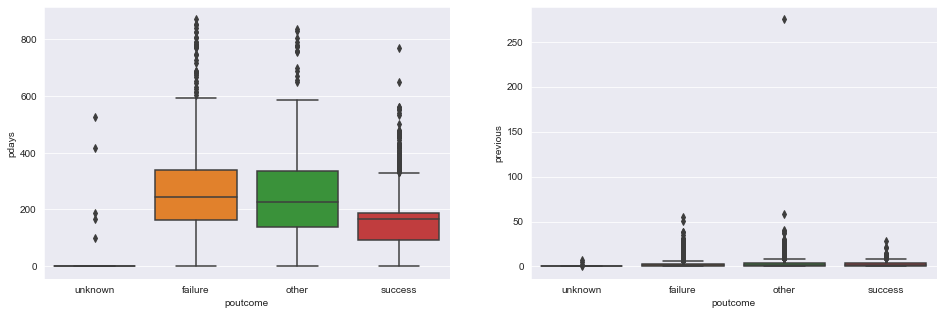

In [25]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(x = df['poutcome'], y = df['pdays'], ax=axes.flat[0])
sns.boxplot(x = df['poutcome'], y = df['previous'],ax=axes.flat[1])
plt.show()

# For poutcome "unknown", almost all the values of pdays = -1 and previous = 0 
# However pdays mean for 'success' is less than for 'failure' & 'other' categories
# Variation in 'previous' column is very less for the different categories

In [26]:
# Same is confirmed by the below crosstab for poutcome 'unknown'

pd.crosstab(index=df[df['poutcome']=='unknown']['poutcome'], columns = [df['pdays'],df['previous']]).T

,poutcome,unknown
pdays,previous,
-1,0,36954
98,1,1
168,5,1
188,2,1
416,2,1
528,7,1


In [27]:
# Let's the analyze the correlation b/w pdays and previous in more detail. 

# Feature engineering will have to be performed to separate the '-1' values out of the column to derive any further insight

df[df['pdays']==-1]['previous'].value_counts().to_frame()
df[df['previous']==0]['pdays'].value_counts().to_frame()

# 'previous' = 0 for all rows where 'pdays' == -1.and vice versa 
# It indicates that pdays and previous column have significant overlap

,pdays
-1,36954


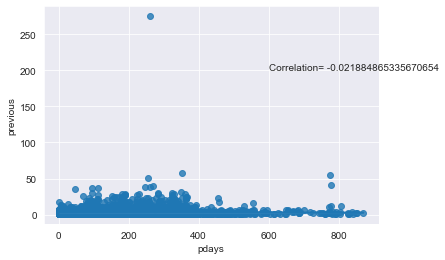

In [28]:
sns.regplot(df[df['pdays']!=-1]['pdays'], df[df['pdays']!=-1]['previous'])
plt.text(x=600, y=200, s = 'Correlation= '+str(df[df['pdays']!=-1]['pdays'].corr(df[df['pdays']!=-1]['previous'])))
plt.show()

# No correlation when you remove pdays = -1

In [29]:
# Hence we decide to remove 'pdays' and 'previous' from the features since they show high degree of correlation with 'poutcome' (majority common values pdays -1 = previous 0 = poutcome 'unknown')

df_num.drop(['pdays','previous'], axis=1, inplace=True)

### 'DAY' TO 'WEEK'

In [30]:
# Convert 'day' into categorical variable as follows
# 'day' 1-7 : Week 1 ; 8-14 : Week 2 ; 15-21 : Week 3; 22-28 : Week 4; 29-31 : Week 5

def week_number(x):
    if x in range(1,8): return 'Week 1'
    elif x in range(8,15): return 'Week 2'
    elif x in range(15,22): return 'Week 3'
    elif x in range(22,29): return 'Week 4'
    elif x in range(29,32): return 'Week 5'
    
df_cat['week'] = df_cat['day'].apply(week_number)
df_cat.drop(['day'], axis=1, inplace=True)

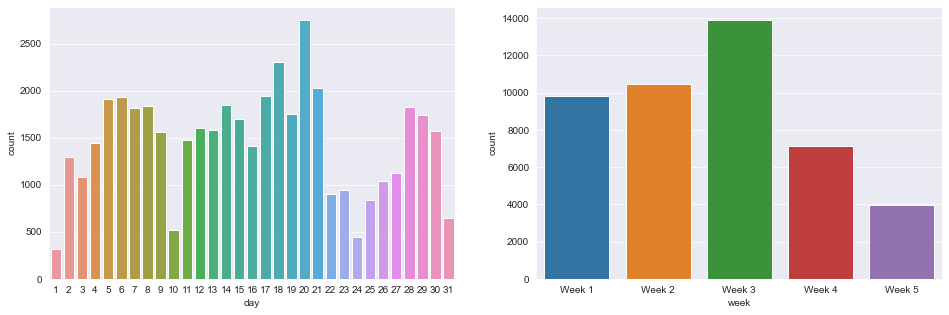

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,5))
sns.countplot(df['day'], ax=axes.flat[0])
sns.countplot(df_cat['week'], ax=axes.flat[1])
plt.show()

# DATA PREPROCESSING

### MISSING VALUE TREATMENT

In [32]:
# Perform mode imputation for 'job' and 'education' since they have low % of missing values

df_cat['job'] = df_cat['job'].replace({'unknown':df_cat['job'].mode()[0]})
df_cat['education'] = df_cat['education'].replace({'unknown': df_cat['education'].mode()[0]})

# For 'poutcome' and 'contact', we treat 'unknown' as a separate category, not missing data

### FEATURE ENCODING

In [33]:
# For binary columns - default, housing and loan, we will perform simple label encoding (0/1)

for col in ['default','housing','loan']:
    df_cat[col] = df[col].map({'no':0,'yes':1})

In [34]:
# For education column and week column, we will go with ordinal encoding with the following sequence
# {'primary' : 0, 'secondary' : 1, 'tertiary' : 2}
# {'week 1': 0 , 'week 2': 1, 'week 3': 2, 'week 4': 3, 'week 5': 4}

df_cat['education'] = df_cat['education'].map({'primary':0,'secondary':1,'tertiary':2})
df_cat['week'] = df_cat['week'].map({'Week 1': 0 , 'Week 2': 1, 'Week 3': 2, 'Week 4': 3, 'Week 5': 4})

In [35]:
# Marital, contact and poutcome column have 3-4 categories each, so we will perform dummy encoding
# Dummy encoding for columns with more than 2 levels will improve the explainability of model

df_cat_dummies = pd.get_dummies(df_cat[['contact', 'marital','poutcome']])
df_cat = pd.concat([df_cat,df_cat_dummies], axis=1).drop(['contact', 'marital','poutcome'], axis=1)

In [36]:
# For the month & job columns, we will perform frequency encoding (since there are 12 levels & dummy encoding will create too many new features)

# There are 2 types:- 
# Ordinary frequency encoding - we replace each category by its frequency in the train set
# Target encoding - we replace each category by the frequency of the required target class ('yes') for it.

In [37]:
# Perform train test split before applying frequency encoding for the remaining categorical variables
# to avoid the problem of "data leakage"

X = pd.concat([df_cat, df_num], axis=1)
y = df[['y']]

# Stratified train-test split based on target column

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31647, 21) (13564, 21)
(31647, 1) (13564, 1)


In [38]:
job_freq = X_train['job'].value_counts(normalize=True)
month_freq = X_train['month'].value_counts(normalize=True)

X_train['job'] = X_train['job'].map(job_freq)
X_train['month'] = X_train['month'].map(month_freq)

# Do the same for test data
X_test['job'] = X_test['job'].map(job_freq)
X_test['month'] = X_test['month'].map(month_freq)

In [39]:
# Finally transform the target classes to 0 and 1

y_train['y'] = y_train['y'].map({'no':0, 'yes':1})
y_test['y'] = y_test['y'].map({'no':0, 'yes':1})

### SCALING AND OUTLIER TREATMENT

In [40]:
# Scaling of numerical columns

num_col = list(df_num.columns)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_num = pd.DataFrame(ss.fit_transform(X_train[num_col]), columns = num_col).reset_index(drop=True)
X_test_num = pd.DataFrame(ss.transform(X_test[num_col]), columns = num_col).reset_index(drop=True)

X_train_cat = X_train.drop(num_col,1).reset_index(drop=True)
X_test_cat = X_test.drop(num_col,1).reset_index(drop=True)

X_train_sc = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_sc = pd.concat([X_test_num, X_test_cat], axis=1)

In [41]:
# Since the outliers in duration and balance columns may be significant, we don't remove them

q1 = df_num.quantile(0.25); q3 = df_num.quantile(0.75)
iqr = q3-q1
df_num[((df_num>q3+1.5*iqr) | (df_num<q1-1.5*iqr)).any(axis=1)].shape

(10492, 4)

# MODELLING
### BASE MODEL - LOGISTIC REGRESSION

In [42]:
# We are now ready to do some modelling on our prepared dataset of X_train and y_train
# Let's start by trying to fit a logistic regression base model on our X_train & y_train set
# No scaling of numerical variable done at this point

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_sc_cons = sm.add_constant(X_train_sc)
X_test_sc_cons = sm.add_constant(X_test_sc)

logit_model = sm.Logit(y_train, X_train_sc_cons).fit()
logit_model.summary()

         Current function value: 0.249909
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31628
Method:                           MLE   Df Model:                           18
Date:                Sat, 28 May 2022   Pseudo R-squ.:                  0.3075
Time:                        10:40:37   Log-Likelihood:                -7908.9
converged:                      False   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6001   1.07e+06  -5.61e-07      1.000    -2.1e+06     2.1e+06
age                   0.0497      0.023      2.138      0.032       0.004       0.095
balance               0.0632      0.018      3.477      0.001       0.028       0.099
duration              1.0431      0.019     54.130      0.000       1.005       1.081
campaign             -0.3307      0.037     -8.936      0.000      -0.403      -0.258
job                  -0.7504      0.301     -2.491      0.013      -1.341      -0.160
education             0.2020      0.034      5.911      0.000       0.135       0.269
default              -0.3130      0.206     -1.522      0.128      -0.716       0.090
housing              -0.6237      0.047    -13.236      0.000      -0.716      -0.531
loan                 -0.5722      0.070     -8.225      0.000      -0.709      -0.436
month                -2.8930      0.263    -10.996      0.000      -3.409      -2.377
week                 -0.0209      0.017     -1.209      0.227      -0.055       0.013
contact_cellular      0.0912   1.57e+06    5.8e-08      1.000   -3.08e+06    3.08e+06
contact_telephone     0.1568   1.54e+06   1.02e-07      1.000   -3.02e+06    3.02e+06
contact_unknown      -0.8481   1.49e+06  -5.68e-07      1.000   -2.93e+06    2.93e+06
marital_divorced     -0.1951   2.66e+06  -7.35e-08      1.000    -5.2e+06     5.2e+06
marital_married      -0.4040   2.85e+06  -1.42e-07      1.000   -5.59e+06    5.59e+06
marital_single       -0.0010   2.66e+06   -3.8e-10      1.000    -5.2e+06     5.2e+06
poutcome_failure     -0.7151   2.54e+06  -2.81e-07      1.000   -4.98e+06    4.98e+06
poutcome_other       -0.4314   2.54e+06   -1.7e-07      1.000   -4.98e+06    4.98e+06
poutcome_success      1.5748   2.54e+06    6.2e-07      1.000   -4.98e+06    4.98e+06
poutcome_unknown     -1.0285   2.54e+06  -4.05e-07      1.000   -4.98e+06    4.98e+06
=====================================================================================
"""

In [43]:
pd.set_option('display.max_rows',None)
df_odds = pd.DataFrame(np.exp(logit_model.params), columns = ['odds'])
df_odds

,odds
const,0.548730
age,1.051006
balance,1.065226
duration,2.838044
campaign,0.718418
job,0.472199
education,1.223819
default,0.731236
housing,0.535942
loan,0.564296


### MODEL PERFORMANCE EVALUATION

In [44]:
pd.reset_option('display.max_rows')

# calculate the probabilties from the model
y_train_prob = logit_model.predict(X_train_sc_cons)
y_test_prob = logit_model.predict(X_test_sc_cons)

# predicted target labels setting probability threshold as 0.5

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.5 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.5 else 1)

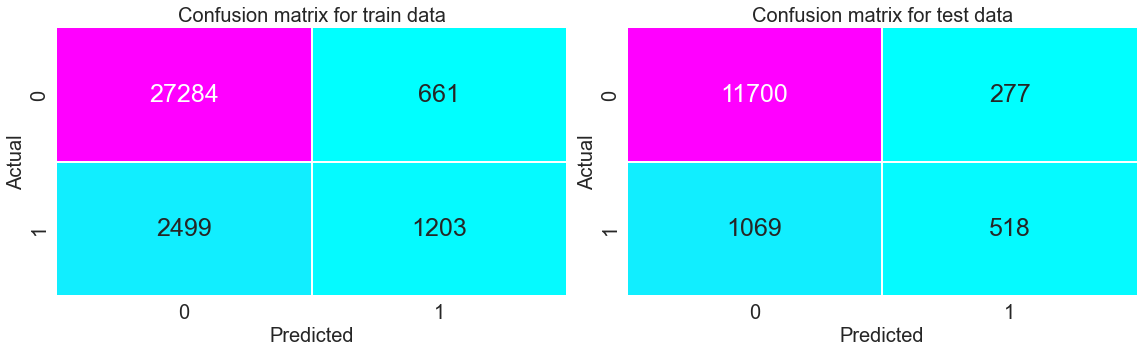

In [45]:
from sklearn.metrics import confusion_matrix

# create confusion matrices for predicted train and test labels
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# display a heat map image of the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(16,5))
ax1 = axes.flat[0]; ax2 = axes.flat[1]
sns.heatmap(train_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25}, ax=ax1)
ax1.set_title('Confusion matrix for train data', fontsize=20)
ax1.set_ylabel('Actual', fontsize=20); ax1.set_xlabel('Predicted', fontsize=20)
ax1.set_xticks([0.5,1.5], labels=[0,1], fontsize = 20); ax1.set_yticks([0.5,1.5],labels=[0,1], fontsize = 20)

sns.heatmap(test_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25}, ax=ax2)
ax2.set_title('Confusion matrix for test data', fontsize=20)
ax2.set_ylabel('Actual', fontsize=20); ax2.set_xlabel('Predicted', fontsize=20)
ax2.set_xticks([0.5,1.5],labels=[0,1],fontsize = 20); ax2.set_yticks([0.5,1.5],labels=[0,1],fontsize = 20)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Create df_scores to store the performance metrics of different models
df_scores = pd.DataFrame()

# Define the function for calculating performance scores of the models
def performance_scores(df, model, y, y_pred):
    cm = confusion_matrix(y,y_pred)
    tp = cm[1,0]; tn = cm[0,0]; fp = cm[0,1]; fn = cm[1,0]
    df.loc[model,'Accuracy'] = accuracy_score(y, y_pred)
    df.loc[model,'Precision'] = precision_score(y, y_pred)
    df.loc[model,'Recall'] = recall_score(y, y_pred)
    df.loc[model,'F1_score'] = f1_score(y, y_pred)
    df.loc[model,'Kappa_score'] = cohen_kappa_score(y, y_pred)

performance_scores(df_scores, 'Train_logistic',y_train, y_train_pred)
performance_scores(df_scores, 'Test_logistic',y_test, y_test_pred)
df_scores

,Accuracy,Precision,Recall,F1_score,Kappa_score
Train_logistic,0.900149,0.645386,0.324959,0.432267,0.384004
Test_logistic,0.900767,0.651572,0.326402,0.434929,0.387059


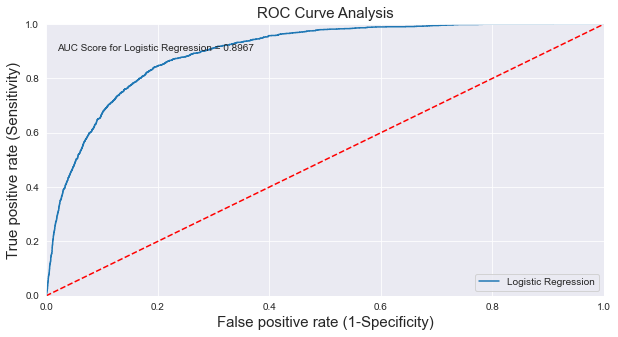

In [47]:
# Plot the ROC curve for out base model

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

def plot_roc_curve(model_name, y_test, y_test_prob, ax):
    plot_roc_curve.counter +=1
    if plot_roc_curve.counter == 1:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        # plot the straight line showing worst prediction for the model
        ax.plot([0, 1], [0, 1],'r--') 

        ax.set_xlabel('False positive rate (1-Specificity)', fontsize = 15)
        ax.set_ylabel('True positive rate (Sensitivity)', fontsize = 15)
        ax.set_title('ROC Curve Analysis', fontsize = 15)
        
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    ax.plot(fpr, tpr, label=model_name)
    ax.legend(loc = 'lower right')

    # add the AUC score to the plot
    offset = 0.1*plot_roc_curve.counter
    auc_score = round(roc_auc_score(y_test, y_test_prob), 4)
    ax.text(x = 0.02, y = 1-offset, s = 'AUC Score for {0} = {1}'.format(model_name,auc_score))
    plt.grid(True)
plot_roc_curve.counter = 0

fig, ax = plt.subplots(1, figsize=(10,5))
plot_roc_curve('Logistic Regression',y_test, y_test_prob, ax)                                    
plt.show()

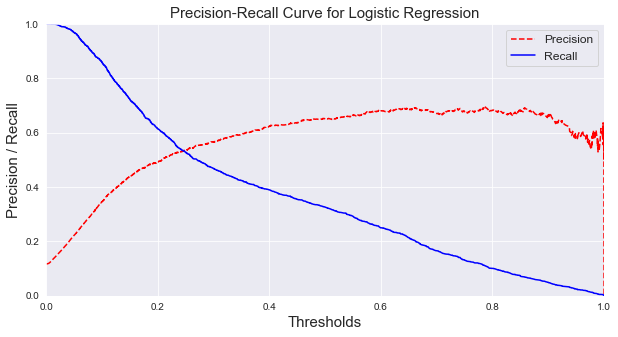

In [48]:
# Plot the precision - recall curve for the result obtained

from sklearn.metrics import precision_recall_curve

def plot_precision_recall(model_name, y_test, y_test_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precision[:-1], 'r--', label = 'Precision')
    plt.plot(thresholds, recall[:-1], 'b', label = 'Recall')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.title('Precision-Recall Curve for {}'.format(model_name), fontsize = 15)
    plt.xlabel('Thresholds', fontsize = 15)
    plt.ylabel('Precision / Recall', fontsize = 15)
    plt.legend(loc = 'best', fontsize = 12)

    plt.show()
plot_precision_recall('Logistic Regression', y_test, y_test_prob)

In [49]:
# Finding the optimum threshold value by comparing performance metrics

threshold = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
score_card = pd.DataFrame()

for value in threshold:
    y_test_pred = [0 if x<value else 1 for x in y_test_prob]
    performance_scores(score_card, value, y_test, y_test_pred)
score_card
score_card.style.highlight_max(color = 'lightblue')

# Based on score card, we can choose a threshold of 0.1-0.2 as optimum
# The threshold obtained reflects the imbalance existing in our target variable

,Accuracy,Precision,Recall,F1_score,Kappa_score
0.1,0.793129,0.345657,0.860113,0.493136,0.391578
0.2,0.880566,0.491688,0.614997,0.546473,0.478682
0.3,0.895827,0.566311,0.468179,0.512591,0.454859
0.4,0.901135,0.623992,0.390044,0.480031,0.428601
0.5,0.900767,0.651572,0.326402,0.434929,0.387059
0.6,0.898555,0.680961,0.250158,0.365899,0.323360
0.7,0.892804,0.670077,0.165091,0.264914,0.229263
0.8,0.889339,0.683761,0.100819,0.175728,0.150174
0.9,0.885801,0.661017,0.049149,0.091496,0.076540


In [50]:
# Predicted target labels setting optimum probability threshold

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.2 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.2 else 1)

# Add the optimum scores to our scores dataframe

performance_scores(df_scores, 'Train_logistic_optimum', y_train, y_train_pred)
performance_scores(df_scores, 'Test_logistic_optimum', y_test, y_test_pred)

df_scores

,Accuracy,Precision,Recall,F1_score,Kappa_score
Train_logistic,0.900149,0.645386,0.324959,0.432267,0.384004
Test_logistic,0.900767,0.651572,0.326402,0.434929,0.387059
Train_logistic_optimum,0.880494,0.491308,0.610751,0.544557,0.476709
Test_logistic_optimum,0.880566,0.491688,0.614997,0.546473,0.478682


### DECISION TREE

In [52]:
# Load and prepare the data for modelling
# Data preparation involves dummy encoding of categorical variables & scaling of numerical variables (not done here)

num_col = ['age','balance','duration','campaign','pdays','previous']
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']

df = pd.read_csv('D:/PGP-DSE/Capstone/Dataset/bank/bank-full.csv', sep = ';')
df_num = df[num_col]
df_cat = df[cat_col]
df_cat_dummies = pd.get_dummies(df_cat)
X = pd.concat([df_num, df_cat_dummies], axis=1)
y = df['y'].replace({'no':0, 'yes':1})

In [53]:
# Stratified shuffle split to balance the target classes in train & test data

# from sklearn.model_selection import StratifiedShuffleSplit
# strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)
# train_idx, test_idx = next(strat_split.split(X, y))

# X_train = X.take(list(train_idx), axis=0)
# y_train = y.take(list(train_idx), axis=0)
# X_test = X.take(list(test_idx), axis=0)
# y_test = y.take(list(test_idx), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31647, 51) (13564, 51)
(31647,) (13564,)


In [54]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=np.asarray(y_train))
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.5662372517444981, 1: 4.274311183144246}

In [55]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt_model = dtc.fit(X_train, y_train)
y_test_pred = dt_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

# Overfitting in train set is observed which can be reduced using various pruning methods

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.49      0.50      0.49      1587

    accuracy                           0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



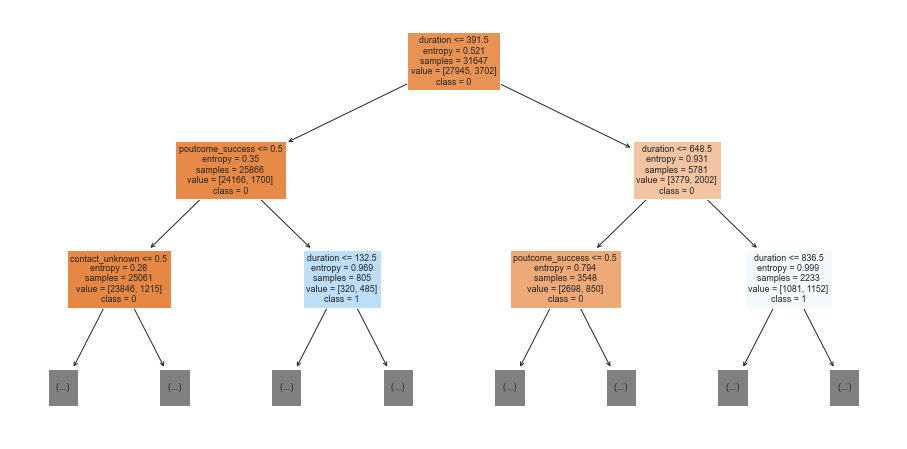

In [56]:
# Plot the decision tree

from sklearn import tree
fig = plt.figure(figsize=(16,8))

tree.plot_tree(dt_model,feature_names = X_train.columns, class_names=["0","1"], max_depth=2, filled=True)
plt.show()

### ENSEMBLE MODELS

In [57]:
# We will try two different models - Random Forest (bagging) & XGBoost (Gradient Boosting) to compare the performancs.

rfc = RandomForestClassifier(n_estimators = 100, random_state=15)
rfc_model = rfc.fit(X_train, y_train)
y_test_pred = rfc_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.39      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [58]:
xgb = XGBClassifier(n_estimators = 100, random_state=15, importance_type='total_gain', verbosity = 0)
xgb_model = xgb.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11977
           1       0.63      0.51      0.56      1587

    accuracy                           0.91     13564
   macro avg       0.79      0.73      0.76     13564
weighted avg       0.90      0.91      0.90     13564



In [59]:
# We create dataframe to store the prediction scores of different models

df_scores_models = pd.DataFrame()

logreg = LogisticRegression(solver='liblinear')
logit_model = logreg.fit(X_train_sc, y_train)

performance_scores(df_scores_models,'Logistic Regression', y_test, logit_model.predict(X_test_sc))
performance_scores(df_scores_models,'Decision Tree', y_test, dt_model.predict(X_test))
performance_scores(df_scores_models,'Random Forest', y_test, rfc_model.predict(X_test))
performance_scores(df_scores_models,'XGboost', y_test, xgb_model.predict(X_test))

In [60]:
# Comparison of different models

df_scores_models

,Accuracy,Precision,Recall,F1_score,Kappa_score
Logistic Regression,0.900767,0.651955,0.325772,0.434454,0.386631
Decision Tree,0.880492,0.489480,0.498425,0.493912,0.426165
Random Forest,0.903937,0.650424,0.386894,0.485184,0.435956
XGboost,0.907992,0.633781,0.505986,0.562719,0.512027


# MODEL VALIDATION & FINETUNING

In [61]:
# In order to find out how well the results will generalize, we have to use cross validation to calculate and compare the prediction scores.
# Calculate the metrics for all 4 models used so far (Logistic Regression, DT, Random Forest & XGboost)

models_dict = {'Logistic Regression': logit_model, 'Decision Tree': dt_model, 
               'Random Forest': rfc_model, 'XGBoost': xgb_model}

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
kappa = make_scorer(cohen_kappa_score)

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

In [62]:
df_cross_val = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'f1_score', 'kappa'])

# Define the function for calculating cross validated scores
def cross_validate_model(df, model_name, X_train, y_train):
    model = models_dict[model_name]
    accuracy_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='f1')
    kappa_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring = kappa)
    mean_scores = [accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean(), kappa_scores.mean()]
    df_cross_val.loc[model_name, ['accuracy', 'precision', 'recall', 'f1_score', 'kappa']] = mean_scores

for model_name in models_dict:
    cross_validate_model(df_cross_val, model_name, X_train, y_train)
df_cross_val

# We can see that Xgboost has by far the best performance

,accuracy,precision,recall,f1_score,kappa
Logistic Regression,0.901033,0.648108,0.337655,0.443646,0.395233
Decision Tree,0.875502,0.468352,0.475141,0.471608,0.401067
Random Forest,0.904983,0.667738,0.374388,0.479498,0.431769
XGBoost,0.906911,0.633023,0.485953,0.54967,0.498777


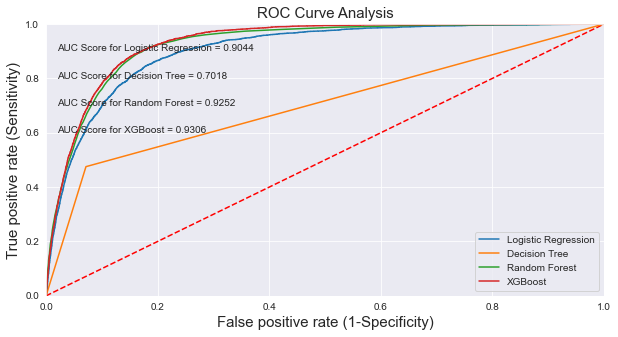

In [63]:
# Plot & compare the ROC curves

from sklearn.model_selection import cross_val_predict

plot_roc_curve.counter = 0
fig, ax = plt.subplots(1, figsize=(10,5))
for model_name in models_dict:
    model = models_dict[model_name]
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
    plot_roc_curve(model_name, y_train, y_pred_prob[:,1], ax)

plt.show()

## ROC curve of Decision Tree Model seems to show the effect of overfitting

### We find that XGBoost has the highest baseline performance in terms of recall and AUC score. Hence, we can proceed with the XGBoost model for finetuning

### HYPERPARAMETER TUNING

In [81]:
from sklearn.model_selection import RandomizedSearchCV

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state=10)
params = {'n_estimators' : [100],
          'learning_rate': [0.01, 0.1, 0.3, 1],
          'subsample': [0.6,0.7,0.8,0.9,1],
          'colsample_bytree': [0.6,0.7,0.8,0.9,1],
          'scale_pos_weight': [1,2,3,4,5,6,7,8]}

xgb_grid = RandomizedSearchCV(xgb_model, param_distributions=params, scoring='average_precision', cv=cv)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 1,
 'n_estimators': 100,
 'max_depth': 40,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

In [94]:
best_params = {'n_estimators': 100,
                'learning_rate': 0.1,
                'subsample': 0.7,
                'colsample_bytree': 0.8,
                'scale_pos_weight': 2}

In [95]:
# Build the model based on optimum hyperparameters

xgb_best = XGBClassifier(random_state=15, importance_type='total_gain', verbosity=0, **best_params)
xgb_best.fit(X_train, y_train)
y_test_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11977
           1       0.59      0.67      0.63      1587

    accuracy                           0.91     13564
   macro avg       0.77      0.80      0.79     13564
weighted avg       0.91      0.91      0.91     13564



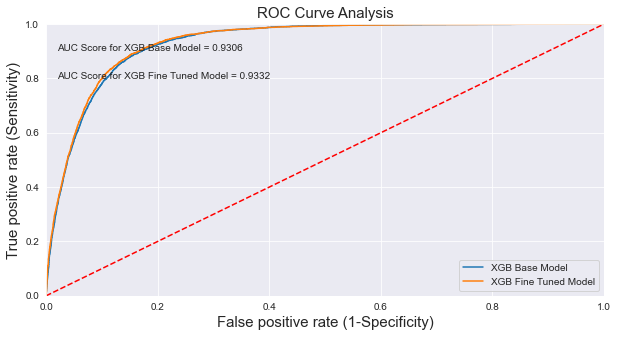

In [96]:
# Compare the ROC curves and AUC scores for fine-tuned model with base model

fig, ax = plt.subplots(1, figsize=(10,5))
plot_roc_curve.counter = 0
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

y_pred_prob = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')
plot_roc_curve('XGB Base Model', y_train, y_pred_prob[:,1], ax)
y_pred_prob = cross_val_predict(xgb_best, X_train, y_train, cv=cv, method='predict_proba')
plot_roc_curve('XGB Fine Tuned Model', y_train, y_pred_prob[:,1], ax)
plt.show()

In [97]:
# Choosing the optimum threshold for final model

threshold = np.arange(0,1,0.05)
score_card = pd.DataFrame()
y_test_prob = xgb_best.predict_proba(X_test)[:,1]
for value in threshold:
    y_test_pred = [0 if x<value else 1 for x in y_test_prob]
    performance_scores(score_card, value, y_test, y_test_pred)
score_card.sort_values(by='Recall', ascending=False).head(10)

,Accuracy,Precision,Recall,F1_score,Kappa_score
0.00,0.117001,0.117001,1.000000,0.209491,0.000000
0.05,0.695739,0.275777,0.984247,0.430837,0.303532
0.10,0.786272,0.349472,0.959672,0.512363,0.411397
0.15,0.825052,0.394920,0.930687,0.554534,0.466961
0.20,0.850118,0.432383,0.898551,0.583828,0.505745
0.25,0.869286,0.468539,0.872716,0.609729,0.539635
0.30,0.882925,0.499813,0.841840,0.627230,0.563078
0.35,0.892952,0.527835,0.806553,0.638086,0.578464
0.40,0.898186,0.546649,0.760555,0.636100,0.578748
0.45,0.903126,0.568080,0.717706,0.634187,0.579227


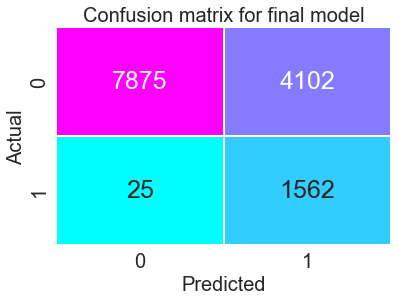

In [98]:
# Final prediction results for fine-tuned model

y_test_pred = [0 if x<0.05 else 1 for x in y_test_prob]
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion matrix for final model', fontsize=20)
plt.ylabel('Actual', fontsize=20); plt.xlabel('Predicted', fontsize=20)
plt.xticks([0.5,1.5],labels=[0,1],fontsize = 20); 
plt.yticks([0.5,1.5],labels=[0,1],fontsize = 20)
plt.show()

# MODEL INTERPRETATION

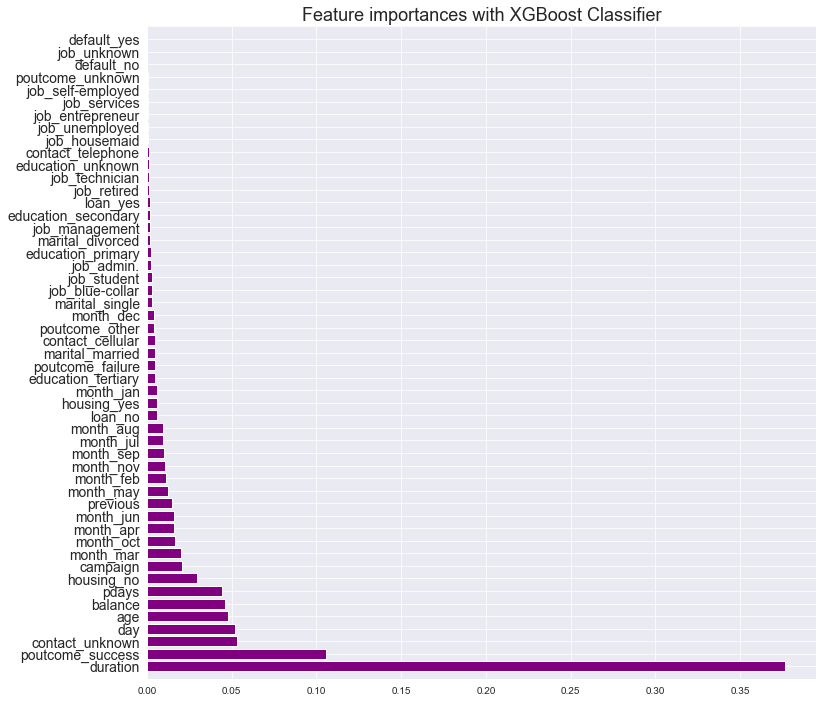

In [99]:
# Feature importance gives a measure of how significant a feature is for classifying the data. Here the metric
# used is total gain of information due to a feature.

features_imp = pd.DataFrame()
features_imp['features'] = X_train.columns
features_imp['importances'] = xgb_best.feature_importances_
features_imp.sort_values(by = 'importances', ascending=False, inplace=True)

# Plot the feature ranking

plt.figure(figsize=(12,12))
plt.barh(features_imp['features'], features_imp['importances'], color='purple',  align="center")

plt.title("Feature importances with XGBoost Classifier", fontsize=18)
plt.yticks(range(len(features_imp)), features_imp['features'], rotation='horizontal',fontsize=14)
plt.ylim([-1, len(features_imp)])
plt.show()

In [76]:
features_imp[:20].sum(numeric_only=True)

# Top 20 features account for more than 90% of the feature importance

importances    0.921137
dtype: float64

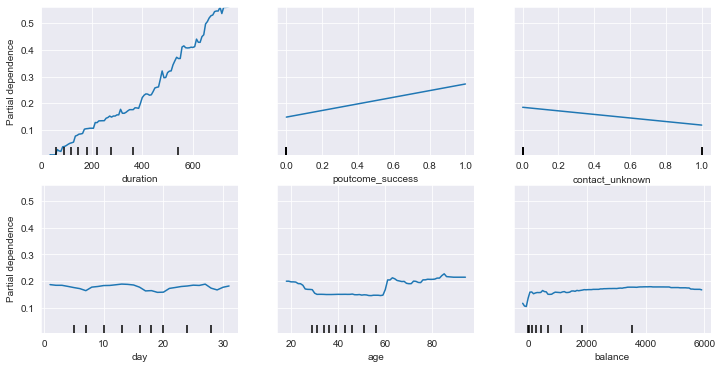

In [103]:
# Plot partial dependency plots for top 6 features

fig, axes = plt.subplots(1,1, figsize=(12,6))
from sklearn.inspection import PartialDependenceDisplay
imp_feat = [features_imp['features'][:6].values]
pd_plot = PartialDependenceDisplay.from_estimator(xgb_best, X_test, imp_feat, ax=axes) 

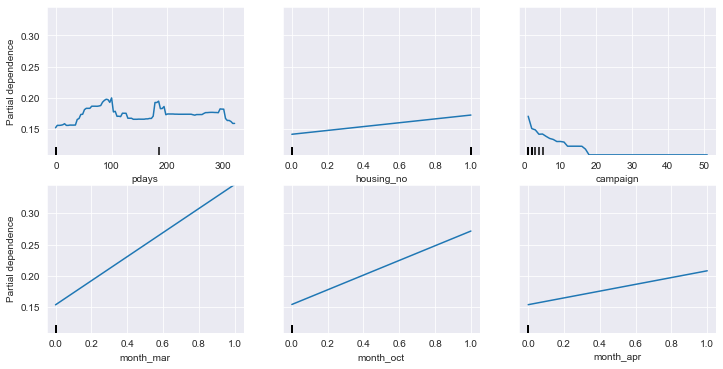

In [113]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
imp_feat = features_imp['features'][6:12].values
pd_plot = PartialDependenceDisplay.from_estimator(xgb_best, X_test, imp_feat, ax=ax) 

# CONCLUSION

## 1. Our model can predict 80% of the clients who are likely to subscribe with a 50% precision rate.
## 2. Duration and poutcome-success are the best predictors for success in customer subscribing to term deposit. Hence, the bank is advised to give high priority to the customers who had subscribed in the previous campaign. Also, increasing the duration of marketing calls can be done by making the calls more interactive and detail-oriented.
## 3. Since having an outstanding loan is found to be negatively correlated with subscribing to term deposit, the bank is advised to give a lower priority to such customers.  